In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder

In [12]:
base_df = pd.read_csv("../Data/Processed/merged.csv")
leads_df = pd.read_csv("../Data/Processed/leads.csv")
offers_df = pd.read_csv("../Data/Processed/offers.csv") 

# Understanding the offers data

In [13]:
offers_df

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,Not_Specified
1,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,Not_Specified
2,9pl1etry,Corporate Events,Closed Won,2019-12-18,2019-12-18,768.0,2SEMESTERS20OFF,operations,Not_Specified
3,7tkbogep,Corporate Events,Closed Won,2019-11-18,2019-11-18,300.0,MONTH50CUTBACK,operations,Not_Specified
4,locj094j,Corporate Events,Closed Won,2019-11-18,2019-11-19,300.0,MONTH50CUTBACK,quality of delivery,Not_Specified
...,...,...,...,...,...,...,...,...,...
4957,uxztx07y,Corporate Events,Closed Lost,2019-05-20,2019-05-20,0.0,Not_Specified,financial control,no response
4958,ut9flvo3,Corporate Events,Closed Won,2019-05-20,2019-05-20,150.0,QUARTERLY75OFF,operations,Not_Specified
4959,88tre7ve,Corporate Events,Closed Lost,2019-05-20,2019-05-20,768.0,2SEMESTERS20OFF,operations,no response
4960,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,Not_Specified,operations,no product fit


In [14]:
# Changing the type of variable of dates fields
offers_df["Created Date"] = pd.to_datetime(offers_df["Created Date"])
offers_df["Close Date"] = pd.to_datetime(offers_df["Close Date"])

In [15]:
offers_df.dtypes

Id                       object
Use Case                 object
Status                   object
Created Date     datetime64[ns]
Close Date       datetime64[ns]
Price                    object
Discount code            object
Pain                     object
Loss Reason              object
dtype: object

In [16]:
# Create a new column to know how many days took the sales process
offers_df["Days"] = offers_df["Close Date"] - offers_df["Created Date"]

In [17]:
# Creating a column to know if there was applied a discount or not
offers_df["Discount"] = offers_df["Discount code"] != "Not_Specified"

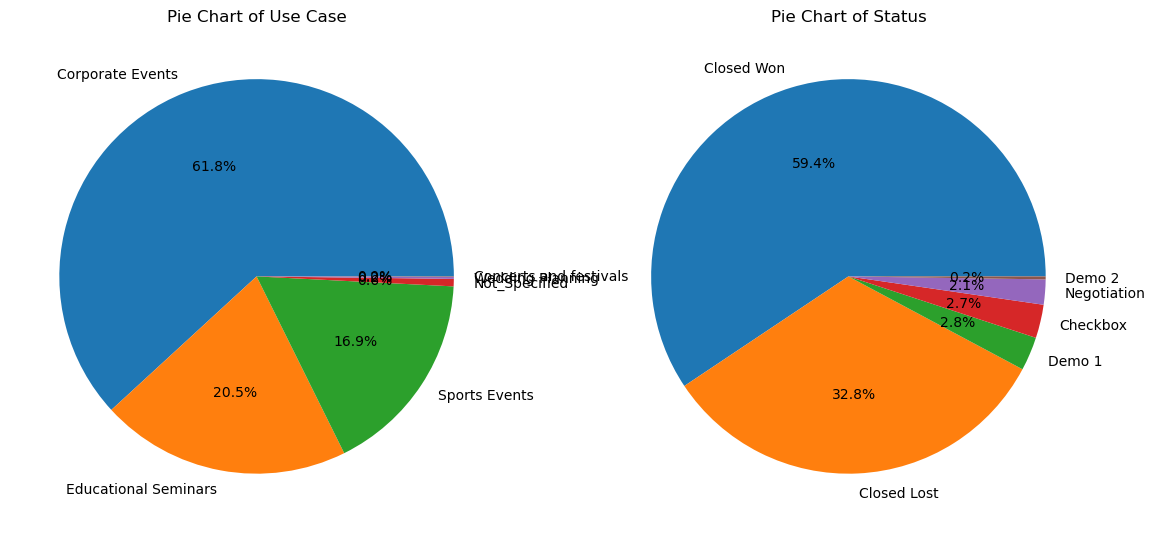

In [18]:

fig, axs = plt.subplots(1, 2, figsize=(14,7)) 

# Pie chart for 'Use Case'
use_case_counts = offers_df['Use Case'].value_counts()
axs[0].pie(use_case_counts, labels = use_case_counts.index, autopct='%1.1f%%')
axs[0].set_title('Pie Chart of Use Case')

# Pie chart for 'Status'
status_counts = offers_df['Status'].value_counts()
axs[1].pie(status_counts, labels = status_counts.index, autopct='%1.1f%%')
axs[1].set_title('Pie Chart of Status')

plt.show()

In [19]:
offers_df.columns

Index(['Id', 'Use Case', 'Status', 'Created Date', 'Close Date', 'Price',
       'Discount code', 'Pain', 'Loss Reason', 'Days', 'Discount'],
      dtype='object')

In [20]:
# Removing unnecessary columns
# "Created Date", "Close Date": already have a column to know how many days took the process
# "Discount code": Already have a column that specified if a code was used or not (the specific code isnt relevant)
# "Loss Reason": gives info of the target variable overfitting the model
offers_reduced = offers_df.drop(["Created Date", "Close Date", "Discount code", "Loss Reason"], axis=1)

In [21]:
offers_reduced

,Id,Use Case,Status,Price,Pain,Days,Discount
0,doqyhjtv,Educational Seminars,Closed Won,300.0,operations,0 days,True
1,cturqi48,Corporate Events,Closed Won,240.0,financial control,0 days,True
2,9pl1etry,Corporate Events,Closed Won,768.0,operations,0 days,True
3,7tkbogep,Corporate Events,Closed Won,300.0,operations,0 days,True
4,locj094j,Corporate Events,Closed Won,300.0,quality of delivery,1 days,True
...,...,...,...,...,...,...,...
4957,uxztx07y,Corporate Events,Closed Lost,0.0,financial control,0 days,False
4958,ut9flvo3,Corporate Events,Closed Won,150.0,operations,0 days,True
4959,88tre7ve,Corporate Events,Closed Lost,768.0,operations,0 days,True
4960,2d15fo90,Corporate Events,Closed Lost,1344.0,operations,6 days,False


## One Hot Encoding

In [22]:
print("Use Case categories: ", len(offers_reduced["Use Case"].unique()))
print("Pain categories: ", len(offers_reduced["Pain"].unique()))


Use Case categories:  6
Pain categories:  5


In [23]:
offers_encoded = pd.get_dummies(offers_reduced, columns=["Use Case","Pain"])

In [24]:
offers_encoded["Price"] = offers_encoded["Price"].replace({"Not_Specified": "0"})

offers_encoded["Price"] = offers_encoded["Price"].astype(float).astype(int)
offers_encoded["Days"] = offers_encoded["Days"].dt.days

In [25]:
offers_encoded

,Id,Status,Price,Days,Discount,Use Case_Concerts and festivals,Use Case_Corporate Events,Use Case_Educational Seminars,Use Case_Not_Specified,Use Case_Sports Events,Use Case_Wedding Planning,Pain_Not_Specified,Pain_financial control,Pain_operations,Pain_quality of delivery,Pain_time saving
0,doqyhjtv,Closed Won,300,0,True,False,False,True,False,False,False,False,False,True,False,False
1,cturqi48,Closed Won,240,0,True,False,True,False,False,False,False,False,True,False,False,False
2,9pl1etry,Closed Won,768,0,True,False,True,False,False,False,False,False,False,True,False,False
3,7tkbogep,Closed Won,300,0,True,False,True,False,False,False,False,False,False,True,False,False
4,locj094j,Closed Won,300,1,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,uxztx07y,Closed Lost,0,0,False,False,True,False,False,False,False,False,True,False,False,False
4958,ut9flvo3,Closed Won,150,0,True,False,True,False,False,False,False,False,False,True,False,False
4959,88tre7ve,Closed Lost,768,0,True,False,True,False,False,False,False,False,False,True,False,False
4960,2d15fo90,Closed Lost,1344,6,False,False,True,False,False,False,False,False,False,True,False,False


# Understanding the leads data

In [26]:
leads_df

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,Not_Specified,Corporate Events,Inbound,Nurturing,Not Fit,Not_Specified,2018-05-26,0.0,Chicago
1,hbzt0kp1,Alex6 Jackson3,Not_Specified,Inbound,Nurturing,Competitor,Not_Specified,2019-03-29,0.0,Denver
2,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,Not_Specified,2018-05-26,0.0,Not_Specified
3,vwm9vcdc,Harper11 Johnson11,Not_Specified,Inbound,Nurturing,Not the right moment,Not_Specified,2019-03-29,0.0,Not_Specified
4,kbfjr4vz,Drew6 Taylor17,Not_Specified,Inbound,Nurturing,Not feeling,Not_Specified,2019-03-29,0.0,Denver
...,...,...,...,...,...,...,...,...,...,...
43967,lpb8obv3,Not_Specified,Corporate Events,Outbound,New,Not_Specified,Digital kit,2020-10-27,0.0,Phoenix
43968,mzcq31rg,Not_Specified,Not_Specified,Outbound,New,Not_Specified,ArtFair,2020-10-27,0.0,Not_Specified
43969,2ajg0z5w,Not_Specified,Corporate Events,Outbound,New,Not_Specified,Not_Specified,2020-10-27,0.0,Not_Specified
43970,k6wq2pi9,Not_Specified,Not_Specified,Outbound,New,Not_Specified,VirtualMeetups,2020-10-27,0.0,Charlotte


In [27]:
leads_df.columns

Index(['Id', 'First Name', 'Use Case', 'Source', 'Status',
       'Discarded/Nurturing Reason', 'Acquisition Campaign', 'Created Date',
       'Converted', 'City'],
      dtype='object')

In [28]:
leads_df.Converted.value_counts()

Converted
0.0    40002
1.0     3970
Name: count, dtype: int64

In [29]:
# Seeing what data is in Status column
leads_df["Status"].unique()

array(['Nurturing', 'Discarded', 'Qualified', 'Meeting', 'New', 'Engaged',
       'Contacted', 'Called', 'Recicled', 'Call', 'Email'], dtype=object)

Text(0.5, 1.0, 'Pie Chart of Status')

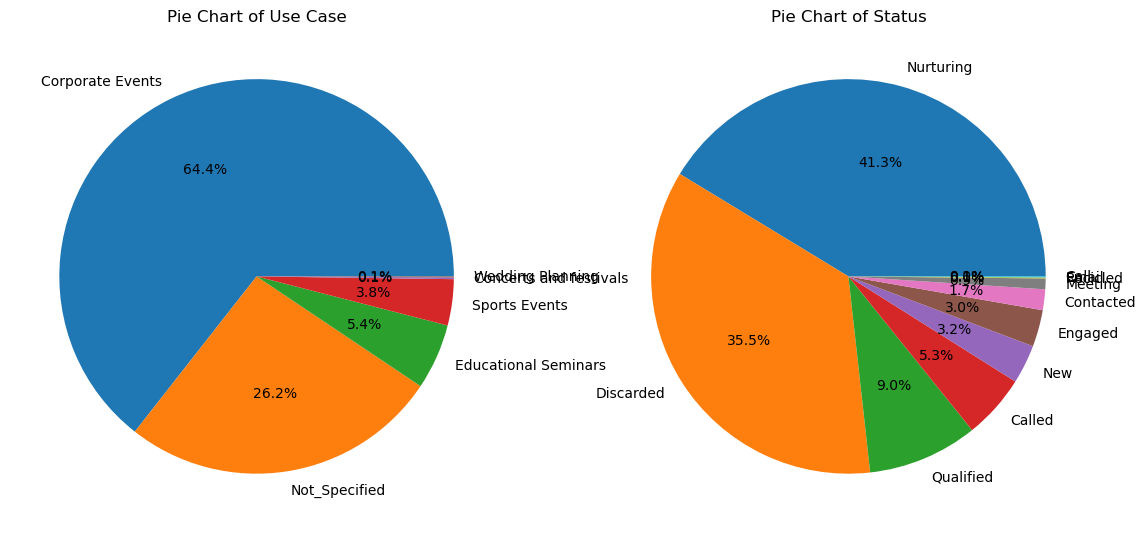

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14,7)) 

# Pie chart for 'Use Case'
use_case_counts = leads_df['Use Case'].value_counts()
axs[0].pie(use_case_counts, labels = use_case_counts.index, autopct='%1.1f%%')
axs[0].set_title('Pie Chart of Use Case')

# Pie chart for 'Status'
status_counts = leads_df['Status'].value_counts()
axs[1].pie(status_counts, labels = status_counts.index, autopct='%1.1f%%')
axs[1].set_title('Pie Chart of Status')

# Reducing the leads_df data

In [31]:
# Transforms the converted variable to bool
leads_df.Converted = leads_df.Converted.astype('bool')

# Removing some unnecessary columns for the algorythm like name or reason why was discarded 
# Discarded reason is a value that is given after know that the person was not converted it wont be an input for this model
# Same for status, it's a variable that contains info about the target value wich can overfit the model
leads_reduced = leads_df.drop(["First Name", "Discarded/Nurturing Reason", "Status"], axis=1)


In [32]:
leads_reduced

,Id,Use Case,Source,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,Corporate Events,Inbound,Not_Specified,2018-05-26,False,Chicago
1,hbzt0kp1,Not_Specified,Inbound,Not_Specified,2019-03-29,False,Denver
2,velluwdq,Corporate Events,Inbound,Not_Specified,2018-05-26,False,Not_Specified
3,vwm9vcdc,Not_Specified,Inbound,Not_Specified,2019-03-29,False,Not_Specified
4,kbfjr4vz,Not_Specified,Inbound,Not_Specified,2019-03-29,False,Denver
...,...,...,...,...,...,...,...
43967,lpb8obv3,Corporate Events,Outbound,Digital kit,2020-10-27,False,Phoenix
43968,mzcq31rg,Not_Specified,Outbound,ArtFair,2020-10-27,False,Not_Specified
43969,2ajg0z5w,Corporate Events,Outbound,Not_Specified,2020-10-27,False,Not_Specified
43970,k6wq2pi9,Not_Specified,Outbound,VirtualMeetups,2020-10-27,False,Charlotte


## One Hot Encoding

In [33]:
leads_reduced["Use Case"].unique()

array(['Corporate Events', 'Not_Specified', 'Educational Seminars',
       'Sports Events', 'Wedding Planning', 'Concerts and festivals'],
      dtype=object)

In [34]:
leads_reduced["Source"].unique()

array(['Inbound', 'Outbound', 'Not_Specified'], dtype=object)

In [35]:
leads_reduced["City"].unique()

array(['Chicago', 'Denver', 'Not_Specified', 'New York', 'San Jose',
       'Jacksonville', 'San Diego', 'San Francisco', 'Philadelphia',
       'Seattle', 'Fort Worth', 'Dallas', 'San Antonio', 'Austin',
       'Charlotte', 'Indianapolis', 'Phoenix', 'Houston', 'Los Angeles',
       'Columbus', 'Washington'], dtype=object)

In [36]:
len(leads_reduced["Acquisition Campaign"].unique())

46

In [37]:
leads_encoded = pd.get_dummies(leads_reduced, columns=["Use Case","Source"])

In [38]:
# Initialize the encoder
encoder = BinaryEncoder(cols=["Acquisition Campaign", "City"])

# Fit and transform the data
leads_encoded = encoder.fit_transform(leads_encoded)


In [39]:
leads_encoded['Created Date'] = pd.to_datetime(leads_encoded['Created Date'])
leads_encoded['month'] = leads_encoded['Created Date'].dt.month
leads_encoded['day'] = leads_encoded['Created Date'].dt.day
leads_encoded = leads_encoded.drop(['Created Date'], axis=1)
leads_encoded

,Id,Acquisition Campaign_0,Acquisition Campaign_1,Acquisition Campaign_2,Acquisition Campaign_3,Acquisition Campaign_4,Acquisition Campaign_5,Converted,City_0,City_1,...,Use Case_Corporate Events,Use Case_Educational Seminars,Use Case_Not_Specified,Use Case_Sports Events,Use Case_Wedding Planning,Source_Inbound,Source_Not_Specified,Source_Outbound,month,day
0,23okrabh,0,0,0,0,0,1,False,0,0,...,True,False,False,False,False,True,False,False,5,26
1,hbzt0kp1,0,0,0,0,0,1,False,0,0,...,False,False,True,False,False,True,False,False,3,29
2,velluwdq,0,0,0,0,0,1,False,0,0,...,True,False,False,False,False,True,False,False,5,26
3,vwm9vcdc,0,0,0,0,0,1,False,0,0,...,False,False,True,False,False,True,False,False,3,29
4,kbfjr4vz,0,0,0,0,0,1,False,0,0,...,False,False,True,False,False,True,False,False,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43967,lpb8obv3,1,0,1,0,0,0,False,1,0,...,True,False,False,False,False,False,False,True,10,27
43968,mzcq31rg,0,1,0,0,1,1,False,0,0,...,False,False,True,False,False,False,False,True,10,27
43969,2ajg0z5w,0,0,0,0,0,1,False,0,0,...,True,False,False,False,False,False,False,True,10,27
43970,k6wq2pi9,0,0,0,1,1,0,False,0,1,...,False,False,True,False,False,False,False,True,10,27


# Merging

In [40]:
merged = pd.merge(leads_encoded, offers_encoded)

In [41]:
offers_df.to_csv("../Data/Processed/offers_enriched.csv", index=False)
leads_df.to_csv("../Data/Processed/leads_enriched.csv", index=False)

leads_encoded.to_csv("../Data/Processed/leads_processed.csv", index=False)
offers_encoded.to_csv("../Data/Processed/offers_processed.csv", index=False)

merged.to_csv("../Data/Processed/merge_processed.csv", index=False)

In [42]:
merged

,Id,Acquisition Campaign_0,Acquisition Campaign_1,Acquisition Campaign_2,Acquisition Campaign_3,Acquisition Campaign_4,Acquisition Campaign_5,Converted,City_0,City_1,...,day,Status,Price,Days,Discount,Pain_Not_Specified,Pain_financial control,Pain_operations,Pain_quality of delivery,Pain_time saving
0,su014jpj,0,0,0,0,0,1,True,0,0,...,17,Closed Lost,240,-255,False,False,False,False,True,False
1,uo3alag3,0,0,0,0,0,1,True,0,0,...,17,Closed Lost,200,0,False,False,True,False,False,False
2,2exqos94,0,0,0,0,0,1,True,0,0,...,1,Checkbox,960,0,True,True,False,False,False,False
3,387283th,0,0,0,0,0,1,True,0,0,...,17,Closed Won,240,0,True,False,False,True,False,False
4,ipkk8eiv,0,0,0,0,0,1,True,0,0,...,1,Closed Lost,360,170,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,z35lw3kn,0,0,0,1,1,0,True,0,0,...,26,Closed Lost,0,0,False,False,True,False,False,False
3709,b1rznob8,0,1,0,0,0,1,True,0,0,...,26,Closed Won,240,0,True,False,False,True,False,False
3710,3iab5imb,0,1,1,0,1,0,True,0,0,...,27,Negotiation,300,0,True,False,False,True,False,False
3711,vxabmzpv,0,1,0,1,0,0,True,0,0,...,27,Closed Won,300,0,True,True,False,False,False,False


In [43]:
offers_df["Status"].unique()

array(['Closed Won', 'Closed Lost', 'Demo 1', 'Negotiation', 'Checkbox',
       'Demo 2'], dtype=object)

In [44]:
leads_encoded

,Id,Acquisition Campaign_0,Acquisition Campaign_1,Acquisition Campaign_2,Acquisition Campaign_3,Acquisition Campaign_4,Acquisition Campaign_5,Converted,City_0,City_1,...,Use Case_Corporate Events,Use Case_Educational Seminars,Use Case_Not_Specified,Use Case_Sports Events,Use Case_Wedding Planning,Source_Inbound,Source_Not_Specified,Source_Outbound,month,day
0,23okrabh,0,0,0,0,0,1,False,0,0,...,True,False,False,False,False,True,False,False,5,26
1,hbzt0kp1,0,0,0,0,0,1,False,0,0,...,False,False,True,False,False,True,False,False,3,29
2,velluwdq,0,0,0,0,0,1,False,0,0,...,True,False,False,False,False,True,False,False,5,26
3,vwm9vcdc,0,0,0,0,0,1,False,0,0,...,False,False,True,False,False,True,False,False,3,29
4,kbfjr4vz,0,0,0,0,0,1,False,0,0,...,False,False,True,False,False,True,False,False,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43967,lpb8obv3,1,0,1,0,0,0,False,1,0,...,True,False,False,False,False,False,False,True,10,27
43968,mzcq31rg,0,1,0,0,1,1,False,0,0,...,False,False,True,False,False,False,False,True,10,27
43969,2ajg0z5w,0,0,0,0,0,1,False,0,0,...,True,False,False,False,False,False,False,True,10,27
43970,k6wq2pi9,0,0,0,1,1,0,False,0,1,...,False,False,True,False,False,False,False,True,10,27


In [45]:
offers_encoded

,Id,Status,Price,Days,Discount,Use Case_Concerts and festivals,Use Case_Corporate Events,Use Case_Educational Seminars,Use Case_Not_Specified,Use Case_Sports Events,Use Case_Wedding Planning,Pain_Not_Specified,Pain_financial control,Pain_operations,Pain_quality of delivery,Pain_time saving
0,doqyhjtv,Closed Won,300,0,True,False,False,True,False,False,False,False,False,True,False,False
1,cturqi48,Closed Won,240,0,True,False,True,False,False,False,False,False,True,False,False,False
2,9pl1etry,Closed Won,768,0,True,False,True,False,False,False,False,False,False,True,False,False
3,7tkbogep,Closed Won,300,0,True,False,True,False,False,False,False,False,False,True,False,False
4,locj094j,Closed Won,300,1,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,uxztx07y,Closed Lost,0,0,False,False,True,False,False,False,False,False,True,False,False,False
4958,ut9flvo3,Closed Won,150,0,True,False,True,False,False,False,False,False,False,True,False,False
4959,88tre7ve,Closed Lost,768,0,True,False,True,False,False,False,False,False,False,True,False,False
4960,2d15fo90,Closed Lost,1344,6,False,False,True,False,False,False,False,False,False,True,False,False


In [46]:
merged

,Id,Acquisition Campaign_0,Acquisition Campaign_1,Acquisition Campaign_2,Acquisition Campaign_3,Acquisition Campaign_4,Acquisition Campaign_5,Converted,City_0,City_1,...,day,Status,Price,Days,Discount,Pain_Not_Specified,Pain_financial control,Pain_operations,Pain_quality of delivery,Pain_time saving
0,su014jpj,0,0,0,0,0,1,True,0,0,...,17,Closed Lost,240,-255,False,False,False,False,True,False
1,uo3alag3,0,0,0,0,0,1,True,0,0,...,17,Closed Lost,200,0,False,False,True,False,False,False
2,2exqos94,0,0,0,0,0,1,True,0,0,...,1,Checkbox,960,0,True,True,False,False,False,False
3,387283th,0,0,0,0,0,1,True,0,0,...,17,Closed Won,240,0,True,False,False,True,False,False
4,ipkk8eiv,0,0,0,0,0,1,True,0,0,...,1,Closed Lost,360,170,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,z35lw3kn,0,0,0,1,1,0,True,0,0,...,26,Closed Lost,0,0,False,False,True,False,False,False
3709,b1rznob8,0,1,0,0,0,1,True,0,0,...,26,Closed Won,240,0,True,False,False,True,False,False
3710,3iab5imb,0,1,1,0,1,0,True,0,0,...,27,Negotiation,300,0,True,False,False,True,False,False
3711,vxabmzpv,0,1,0,1,0,0,True,0,0,...,27,Closed Won,300,0,True,True,False,False,False,False
